In [68]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preprocessing

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

In [7]:
df['Cabin'].isnull().sum()/df.shape[0]

0.7710437710437711

In [8]:
df['Age'].isnull().sum()/df.shape[0]

0.19865319865319866

In [9]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [10]:
# df1 = pd.DataFrame({'a':[1,2,3],'b':[3,4,5]})
# df1

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [15]:
df.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,24.0,0,0,8.05,S


In [16]:
df['Age'].isnull().sum()

177

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 49.7+ KB


In [19]:
df = df.fillna(df.mode().iloc[0])

In [20]:
df.mode().iloc[0]

Survived            0
Pclass              3
Sex                 1
Age         29.699118
SibSp               0
Parch               0
Fare             8.05
Embarked            S
Name: 0, dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 49.7+ KB


In [22]:
df_embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [23]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df.drop(columns=['Embarked'],inplace=True)

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [29]:
df_embarked 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
df_embarked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q       891 non-null    uint8
 1   S       891 non-null    uint8
dtypes: uint8(2)
memory usage: 1.9 KB


In [33]:
df1 = pd.concat([df,df_embarked],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.000000,1,0,7.2500,0,1
1,1,1,0,38.000000,1,0,71.2833,0,0
2,1,3,0,26.000000,0,0,7.9250,0,1
3,1,1,0,35.000000,1,0,53.1000,0,1
4,0,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,1
887,1,1,0,19.000000,0,0,30.0000,0,1
888,0,3,0,29.699118,1,2,23.4500,0,1
889,1,1,1,26.000000,0,0,30.0000,0,0


In [ ]:
# Splitting train and test

In [38]:
X = df1.drop(columns =['Survived'],axis=1)

In [39]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.000000,1,0,7.2500,0,1
1,1,0,38.000000,1,0,71.2833,0,0
2,3,0,26.000000,0,0,7.9250,0,1
3,1,0,35.000000,1,0,53.1000,0,1
4,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,1
887,1,0,19.000000,0,0,30.0000,0,1
888,3,0,29.699118,1,2,23.4500,0,1
889,1,1,26.000000,0,0,30.0000,0,0


In [40]:
y = df1['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [43]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.074115,0.119224
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.013855,-0.019336
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.117216,-0.162184
Q,0.003650,0.221009,-0.074115,-0.013855,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
S,-0.149683,0.074053,0.119224,-0.019336,0.068734,0.060814,-0.162184,-0.499421,1.000000


<Axes: >

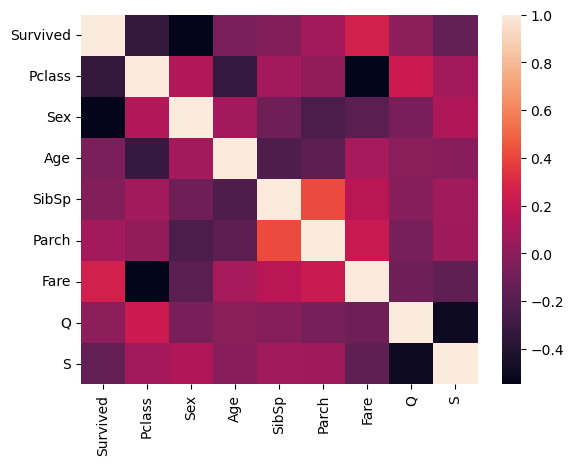

In [44]:
import seaborn as sns
sns.heatmap(df1.corr())

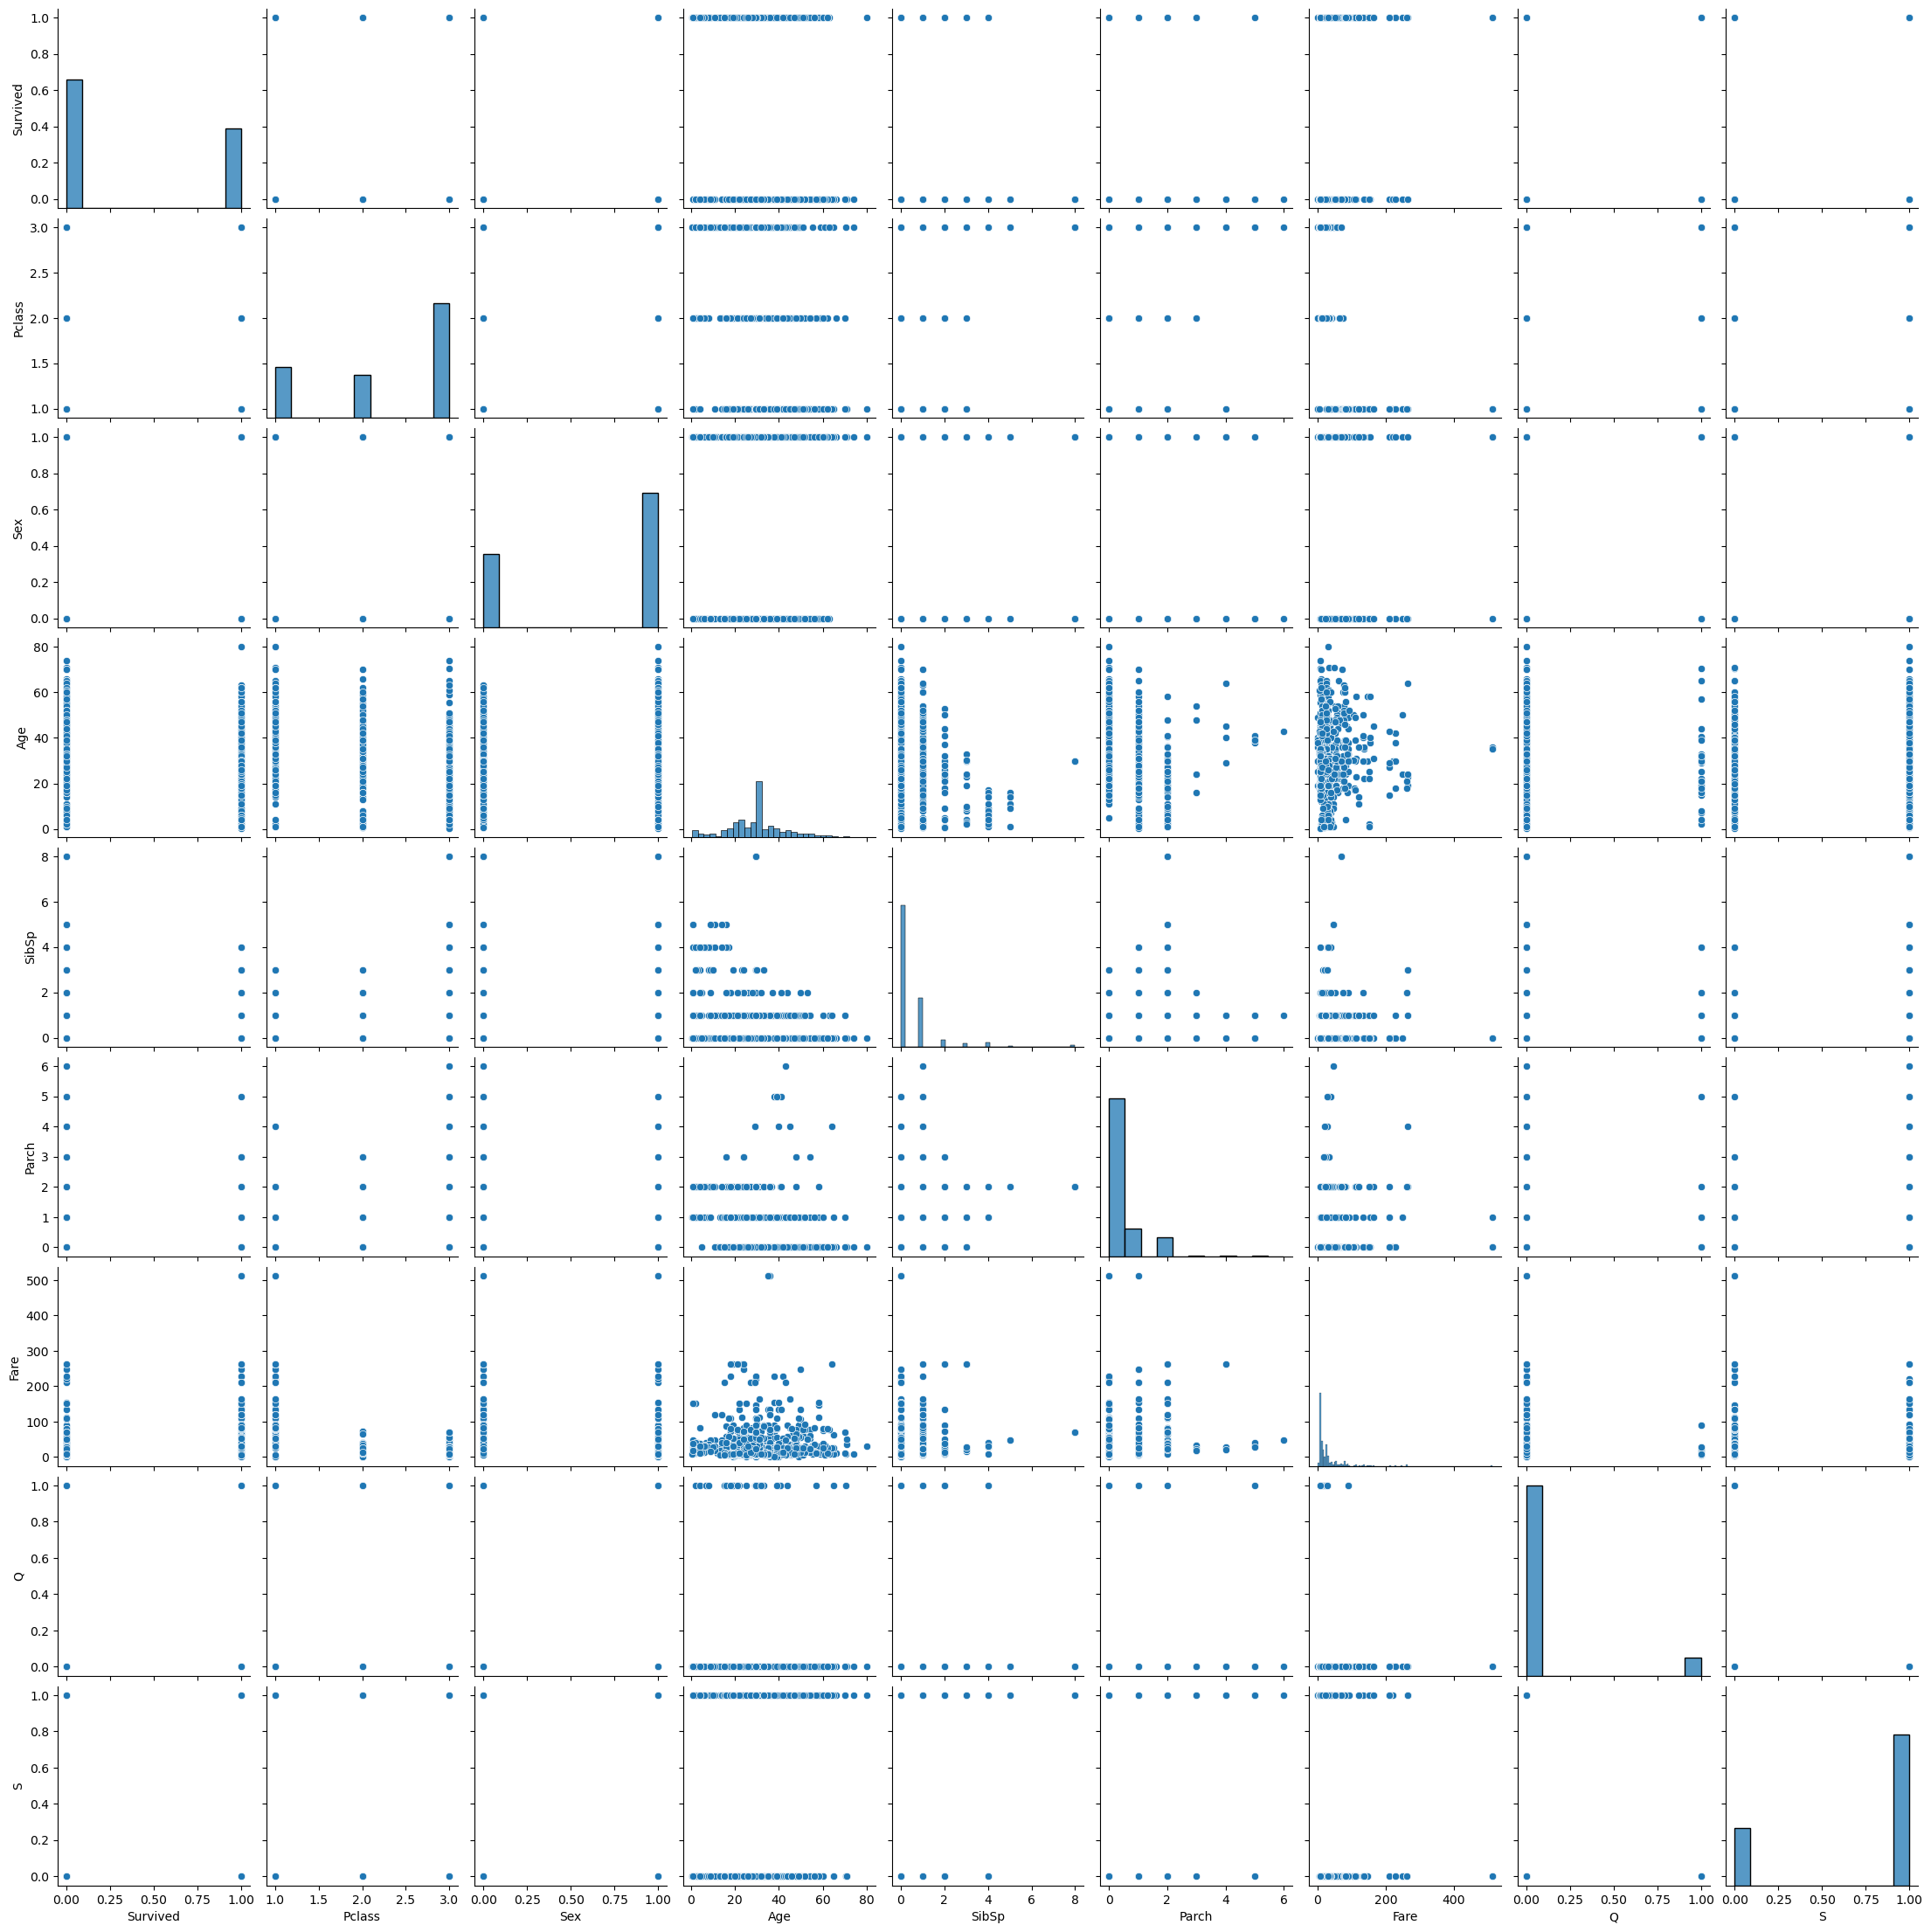

In [45]:
sns.pairplot(df1)

In [46]:
# Machine learning Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.model_selection import train_test_split,cross_val_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
140,3,0,29.699118,0,2,15.2458,0,0
439,2,1,31.000000,0,0,10.5000,0,1
817,2,1,31.000000,1,1,37.0042,0,0
378,3,1,20.000000,0,0,4.0125,0,0
491,3,1,21.000000,0,0,7.2500,0,1
...,...,...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583,0,0
192,3,0,19.000000,1,0,7.8542,0,1
629,3,1,29.699118,0,0,7.7333,1,0
559,3,0,36.000000,1,0,17.4000,0,1


In [52]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [53]:
rfc = RandomForestClassifier()

In [54]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = rfc.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [57]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [58]:
predict = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predict

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,0
...,...,...
780,1,1
837,0,0
215,1,1
833,0,0


In [59]:
# Model evaluation

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.75      0.79        69

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [64]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,100,10
1,17,52


In [65]:
(100+52)/179

0.8491620111731844

In [69]:
np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy'))

0.8059051186017477